In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
from IPython.display import clear_output
pd.set_option('display.max_columns', None)

In [3]:
%cd /home/aloysius/repos/Code \and \Dataset/Dataset
!ls

/home/aloysius/repos/Code and Dataset/Dataset
daily_chart	  login_trades_symbol.csv  reason.csv
daily_report.csv  login_trades_usd.csv	   symbol.csv
login.csv	  README.md		   trades.csv


/home/aloysius/anaconda3/envs/DataAnalytics/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
login_trades_symbol = pd.read_csv("login_trades_symbol.csv")
login_trades_symbol.head()

,login,country,account_currency,reg_date,ticket,symbol,description,type,cmd,volume,open_time,open_price,close_time,close_price,tp,sl,reason,commission,commission_usd,swaps,swaps_usd,profit,profit_usd,volume_usd,dpm
0,7062462,Latvia,EUR,2023-12-22 18:51:59,68880703,XAUUSD,Gold vs US Dollar,Metal,0,0.01,2024-02-13 17:05:41,1991.35000,2024-02-15 16:05:14,2003.01000,0.00000,0.00000,1,0.00,0.00,-1.12,-1.206408,10.83,11.665534,3994.36,4.659634
1,7062462,Latvia,EUR,2023-12-22 18:51:59,68880910,XAUUSD,Gold vs US Dollar,Metal,0,0.02,2024-02-13 17:08:49,1990.30000,2024-02-15 16:05:10,2002.76000,0.00000,0.00000,1,0.00,0.00,-2.25,-2.423588,23.16,24.946794,7986.12,9.961405
2,813125,United Kingdom,GBP,2023-05-20 18:43:18,68120690,US2000,US Small Cap 2000 Cash,Index,0,1.00,2024-01-24 07:56:45,1983.22000,2024-01-24 16:41:43,1996.68000,2012.34000,1980.03000,1,0.00,0.00,0.00,0.000000,105.42,133.959302,39799.00,5.331446
3,813125,United Kingdom,GBP,2023-05-20 18:43:18,68169249,US2000,US Small Cap 2000 Cash,Index,0,2.00,2024-01-24 23:36:11,1960.62000,2024-01-25 16:29:03,1991.51000,2331.85000,1958.94000,1,0.00,0.00,-7.21,-9.156988,485.26,616.299610,79042.60,24.356962
4,88945036,Nigeria,USD,2023-05-01 04:36:26,68186877,NZDUSD,New Zealand Dollar vs US Dollar,Forex,0,0.13,2024-01-25 08:00:00,0.61062,2024-01-25 15:38:26,0.61317,0.61312,0.55059,1,-0.91,-0.91,0.00,0.000000,33.15,33.150000,15909.27,4.056864


<Axes: title={'center': 'Top 10 country with the highest average DPM'}, xlabel='Country', ylabel='Dollar per Million'>

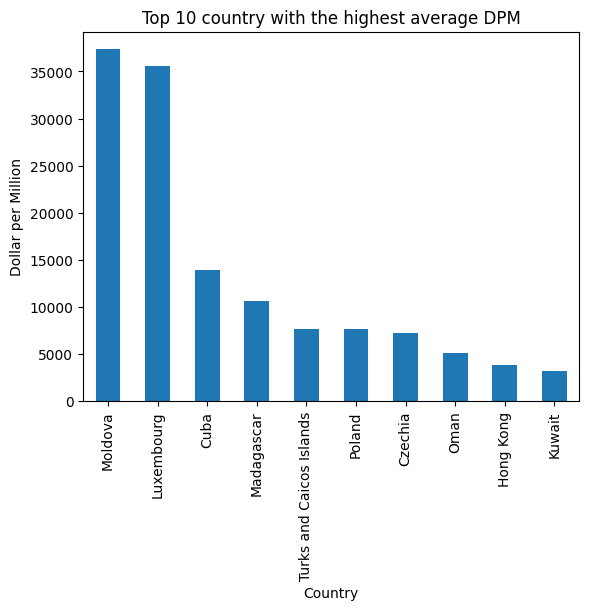

In [30]:
login_trades_symbol.groupby(["country"])["dpm"].mean().nlargest(10).plot(kind = "bar", title = "Top 10 country with the highest average DPM", xlabel = "Country", ylabel = "Dollar per Million")

<Axes: title={'center': 'Top 10 country with the lowest average DPM'}, xlabel='Country', ylabel='Dollar per Million'>

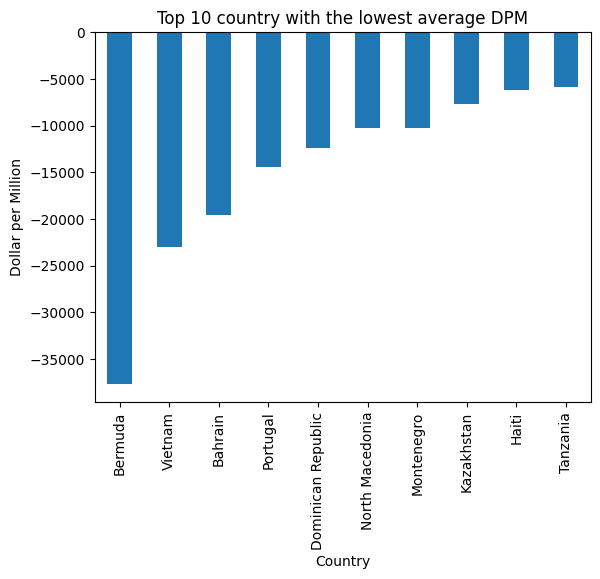

In [32]:
login_trades_symbol.groupby(["country"])["dpm"].mean().nsmallest(10).plot(kind = "bar", title = "Top 10 country with the lowest average DPM", xlabel = "Country", ylabel = "Dollar per Million")

<Axes: title={'center': 'Top 10 symbol with the highest average DPM'}, xlabel='Symbol', ylabel='Dollar per Million'>

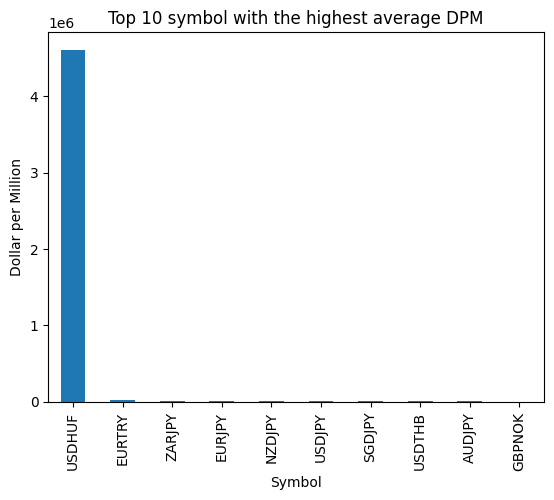

In [39]:
login_trades_symbol.groupby(["symbol"])["dpm"].mean().nlargest(10).plot(kind = "bar", title = "Top 10 symbol with the highest average DPM", xlabel = "Symbol", ylabel = "Dollar per Million")

<Axes: title={'center': 'Top 10 symbol with the lowest average DPM'}, xlabel='Symbol', ylabel='Dollar per Million'>

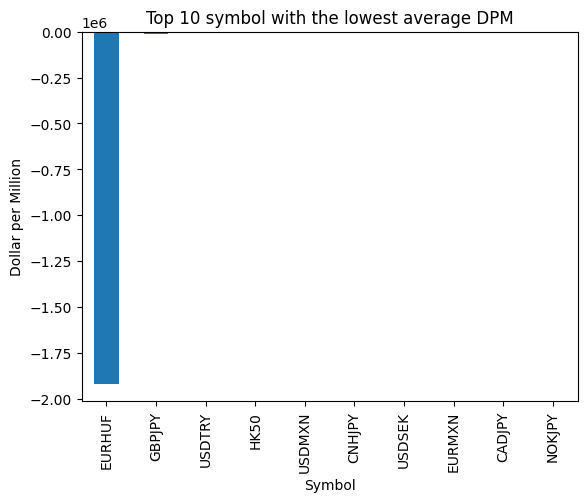

In [38]:
login_trades_symbol.groupby(["symbol"])["dpm"].mean().nsmallest(10).plot(kind = "bar", title = "Top 10 symbol with the lowest average DPM", xlabel = "Symbol", ylabel = "Dollar per Million")

<Axes: title={'center': 'dpm'}, xlabel='type'>

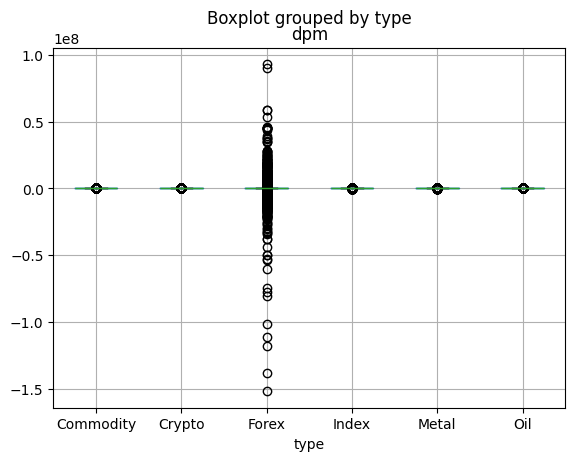

In [37]:
login_trades_symbol.boxplot(by = "type", column = "dpm" )

<Axes: title={'center': 'dpm'}, xlabel='cmd'>

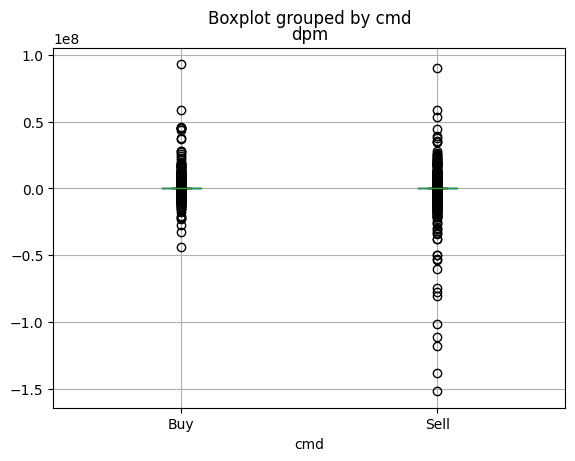

In [43]:
login_trades_symbol.replace({"cmd":{0:"Buy",1:"Sell"}}).boxplot(by = "cmd", column = "dpm" )

In [49]:
login_trades_symbol['open_time'] = pd.to_datetime(login_trades_symbol['open_time'])
login_trades_symbol['close_time'] = pd.to_datetime(login_trades_symbol['close_time'])
time_held = login_trades_symbol['close_time'] - login_trades_symbol['open_time']
time_held

0         1 days 22:59:33
1         1 days 22:56:21
2         0 days 08:44:58
3         0 days 16:52:52
4         0 days 07:38:26
                ...      
4521772   0 days 20:00:22
4521773   0 days 20:00:15
4521774   0 days 00:03:22
4521775   1 days 02:31:58
4521776   0 days 14:47:30
Length: 4521777, dtype: timedelta64[ns]

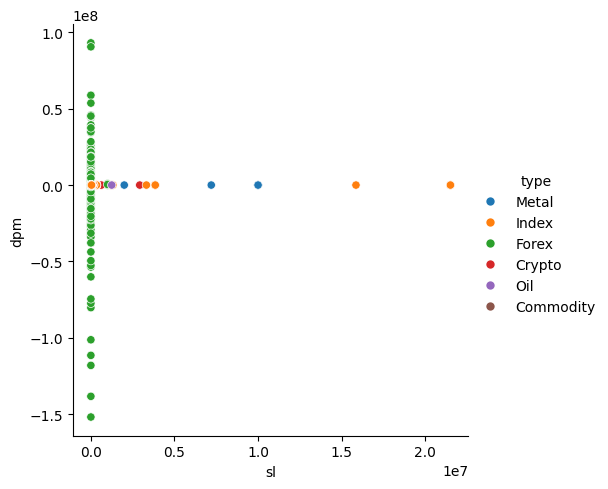

In [55]:
sns.relplot(data=login_trades_symbol, x='sl', y='dpm', hue='type')
plt.show()

<Axes: title={'center': 'Highest average DPM by reason'}, xlabel='Reason', ylabel='Dollar per Million'>

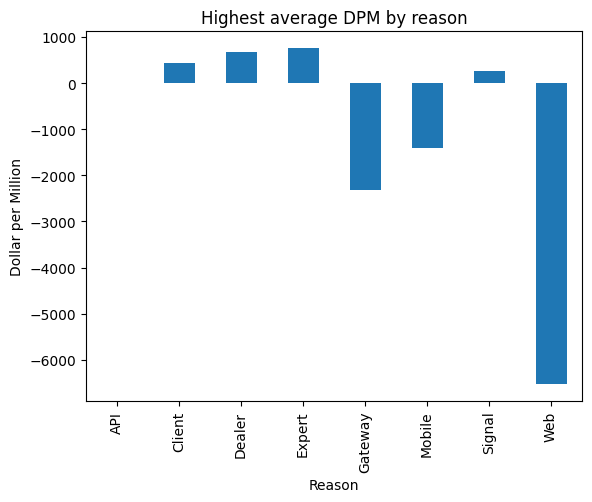

In [53]:
login_trades_symbol.replace({"reason":{0:"Client",1:"Expert",2:"Dealer",3:"Signal",4:"Gateway",5:"Mobile",6:"Web",7:"API"}}).groupby(["reason"])["dpm"].mean().plot(kind = "bar", title = "Highest average DPM by reason", xlabel = "Reason", ylabel = "Dollar per Million")

<Axes: title={'center': 'cmd Count Plot'}, xlabel='cmd', ylabel='Frequency'>

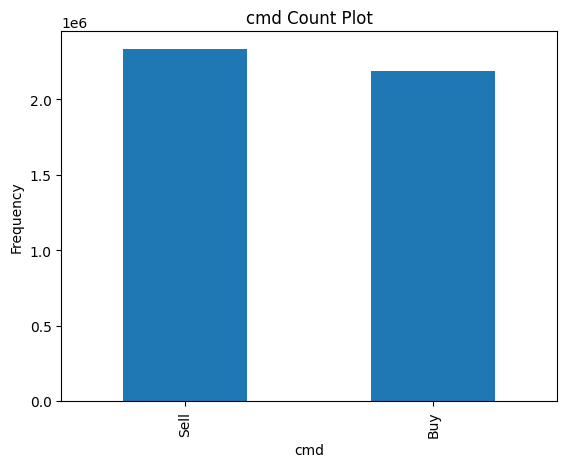

In [61]:
login_trades_symbol.replace({"cmd":{0:"Buy",1:"Sell"}})["cmd"].value_counts().plot(kind="bar", xlabel="cmd",ylabel="Frequency", title="cmd Count Plot")

<Axes: >

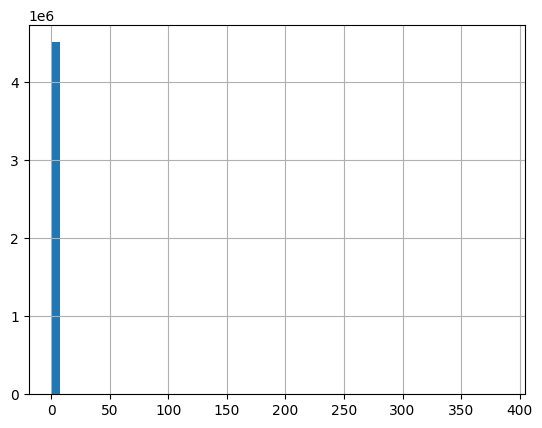

In [85]:
login_trades_symbol["volume"].hist(bins=50)

<Axes: >

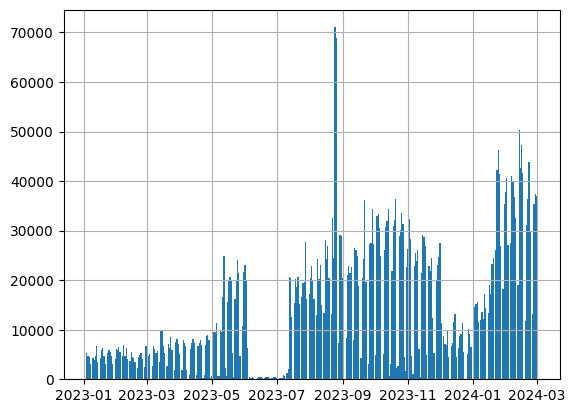

In [87]:
login_trades_symbol["open_time"].hist(bins=365)

<Axes: >

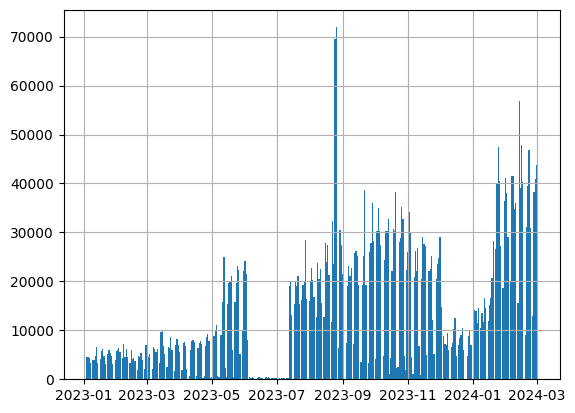

In [88]:
login_trades_symbol["close_time"].hist(bins=365)

<Axes: title={'center': 'reason Count Plot'}, xlabel='reason', ylabel='Frequency'>

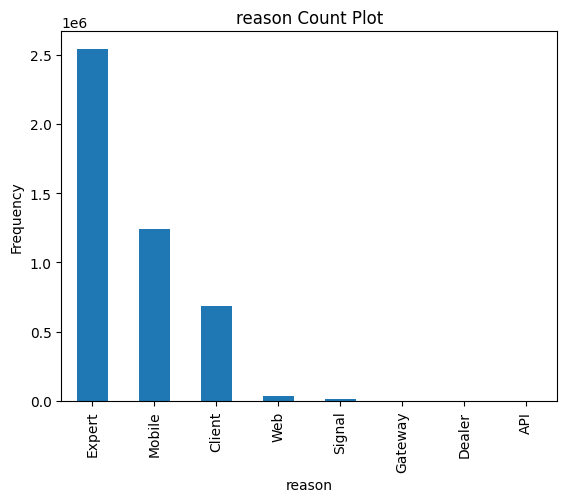

In [97]:
login_trades_symbol.replace({"reason":{0:"Client",1:"Expert",2:"Dealer",3:"Signal",4:"Gateway",5:"Mobile",6:"Web",7:"API"}})["reason"].value_counts().plot(kind="bar", xlabel="reason",ylabel="Frequency", title="reason Count Plot")

<Axes: >

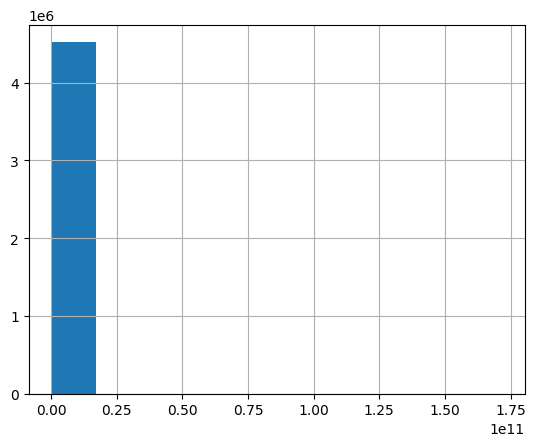

In [102]:
login_trades_symbol["volume_usd"].hist()